# Fitzhugh-Nagumo simplified action-potential model

This example shows how the [Fitzhugh-Nagumo simplified action potential (AP) model](http://www.scholarpedia.org/article/FitzHugh-Nagumo_model) can be used.

The model is based on a simplification and state-reduction of the original squid axon model by Hodgkind and Huxley.
It has two state variables, a voltage-like variable and a recovery variable.


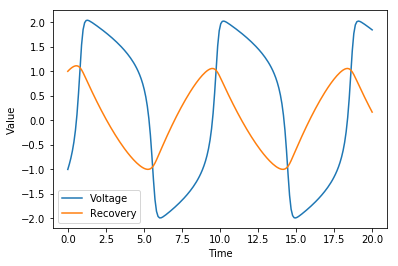

In [28]:
import pints
import pints.toy
import numpy as np
import matplotlib.pyplot as plt

# Create a model
model = pints.toy.FitzhughNagumoModel()

# Run a simulation
parameters = [0.1, 0.1, 3]
times = np.linspace(0, 20, 200)
values = model.simulate(parameters, times)

# Plot the results
plt.figure()
plt.xlabel('Time')
plt.ylabel('Value')
plt.plot(times, values)
plt.legend(['Voltage', 'Recovery'])
plt.show()

With these parameters, the model creates wide AP waveforms that are more reminiscent of muscle cells than neurons.

We now set up a simple optimisation problem with the model.

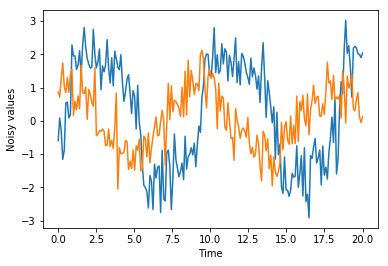

In [29]:
# First add some noise
sigma = 0.5
noisy = values + np.random.normal(0, sigma, values.shape)

# Plot the results
plt.figure()
plt.xlabel('Time')
plt.ylabel('Noisy values')
plt.plot(times, noisy)
plt.show()

Next, we set up a problem. Because this model has multiple outputs (2), we use a [MultiSeriesProblem](http://pints.readthedocs.io/en/latest/core_classes_and_methods.html#multi-series-problem).

In [32]:
problem = pints.MultiSeriesProblem(model, times, noisy)
score = pints.SumOfSquaresError(problem)

Finally, we choose a wide set of boundaries and run!

Minimising error measure
using Covariance Matrix Adaptation Evolution Strategy (CMA-ES)
Running in sequential mode.
Population size: 7
Iter. Eval. Best      Time m:s
0     7      651.6524   0:00.1
1     14     236.9834   0:00.1
2     21     236.9834   0:00.2
3     28     236.9834   0:00.2
20    147    112.5287   0:01.0
40    287    106.1737   0:02.4
60    427    106.1401   0:03.7
80    567    106.14     0:05.1
100   707    106.14     0:06.5
120   847    106.14     0:07.8
140   987    106.14     0:09.2
160   1127   106.14     0:10.5
180   1267   106.14     0:11.8
200   1407   106.14     0:13.2
220   1547   106.14     0:14.6
240   1687   106.14     0:15.9
260   1827   106.14     0:17.2
280   1967   106.14     0:18.6
294   2058   106.14     0:19.5
Halting: No significant change for 200 iterations.
Score at true solution:
106.749664552
Found solution:          True parameters:
 9.80782056682426573e-02     1.00000000000000006e-01
 1.71308034996187313e-09     1.00000000000000006e-01
 2.98290

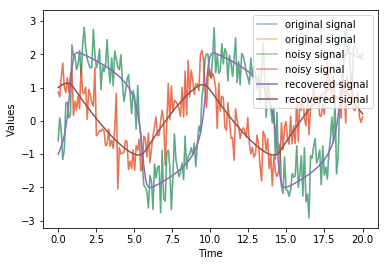

In [34]:
# Select boundaries
boundaries = pints.Boundaries([0., 0., 0.], [10., 10., 10.])

# Select a starting point
x0 = [1, 1, 1]

# Perform an optimization
found_parameters, found_value = pints.optimise(score, x0, boundaries=boundaries)

print('Score at true solution:')
print(score(parameters))

print('Found solution:          True parameters:' )
for k, x in enumerate(found_parameters):
    print(pints.strfloat(x) + '    ' + pints.strfloat(parameters[k]))

# Plot the results
plt.figure()
plt.xlabel('Time')
plt.ylabel('Values')
plt.plot(times, noisy, alpha=0.5, label='original signal')
plt.plot(times, noisy, alpha=0.5, label='noisy signal')
plt.plot(times, problem.evaluate(found_parameters), label='recovered signal')
plt.legend()
plt.show()

The signal is recovered perfectly, but it looks like the second parameter is unidentifiable!